# Frequently Used Data

### data format

In [2]:
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests
from matplotlib.font_manager import fontManager
from collections import Counter

path = "../datasets.jsonl"
font_path = "../TaipeiSansTCBeta-Regular.ttf"

fontManager.addfont(font_path)
mpl.rc('font', family='Taipei Sans TC Beta')

o_dataset = []
with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_dataset.append(data)
print(o_dataset[:2])

o_topic = []
path = "../topics.jsonl"

with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_topic.append(data)
print(o_topic[0])

o_project = []
path = "../projects.jsonl"

with open(path, "r") as f: #游標位置會變
    line_count = 0
    for line in f:
      line_count += 1
    f.seek(0) #讓游標讀取位置回到原點
    for i in range(line_count):
        line = f.readline()
        data = json.loads(line)
        o_project.append(data)
print(o_project[0])

[{'author': '蔡韋漢', 'author_email': None, 'contact_email': 'hank89520@gmail.com', 'contact_person': '蔡韋漢', 'created_time': '2023-08-08', 'creator_user_id': 'b463adf3-d71e-4c46-abe0-016a72eac751', 'data_type': ['archive'], 'end_time': '2023-08-08', 'groups': [], 'id': 'f7cc490c-df6d-4c74-85e6-da3af9f7dc38', 'isopen': True, 'keywords': ['Q64481569'], 'language': ['zho'], 'license_id': 'pd', 'license_title': 'Public Domain', 'license_url': 'https://creativecommons.org/publicdomain/mark/1.0/', 'maintainer': None, 'maintainer_email': None, 'metadata_created': '2023-08-08T07:00:16.070724', 'metadata_modified': '2023-08-14T03:44:45.682193', 'name': '50fa6', 'notes': '', 'num_resources': 2, 'num_tags': 1, 'organization': None, 'private': False, 'process_step': '', 'relationships_as_object': [], 'relationships_as_subject': [], 'remarks': '', 'resources': [{'cache_last_updated': None, 'cache_url': None, 'created': '2023-08-08T07:01:54.950611', 'datastore_active': False, 'datastore_contains_all_re

## Largest author


[('高雄市政府水利局、科進栢誠工程顧問股份有限公司', 117), ('中央研究院人社中心GIS專題中心：台灣歷史文化地圖', 116), ('嘉義縣政府', 99), ('6456', 95), ('逢甲大學水利發展中心', 77), ('6458', 63), ('逢甲大學', 44), ('磐誠工程顧問股份有限公司', 44), ('samson', 37), ('Linda Chang', 37)]


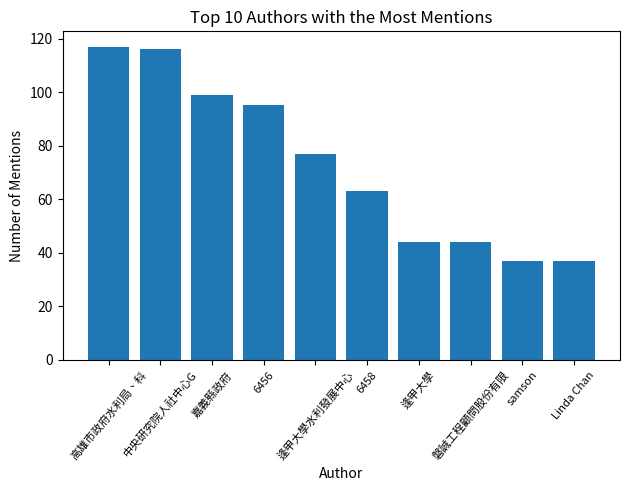

In [9]:
author = []
for i in o_dataset[:-1]: # 最後一個沒有作者
  author.append(i['author'])
author_counts = Counter(author)

top_authors = author_counts.most_common(10)
print(top_authors)
top_authors_names = [i[0][:10] for i in top_authors]
top_authors_mentions = [i[1] for i in top_authors]


plt.bar(top_authors_names, top_authors_mentions)
plt.xlabel('Author')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=50,fontsize=8)
plt.tight_layout()
plt.title('Top 10 Authors with the Most Mentions')

plt.show()
# 可以再做一個比例圓餅圖
## 得知現在的作者有誰

## Largest tags

<p>秀出被使用最多次的tag還有使用次數</p>

[{208, '生態檢核'}, {142, '高雄市'}, {'playaround workshop', 38}, {36, 'UAV'}, {35, '台江國家公園'}, {33, 'UAS'}, {29, '前瞻水環境建設'}, {25, '論文'}, {'水與安全計畫', 24}, {'LTSER', 21}]


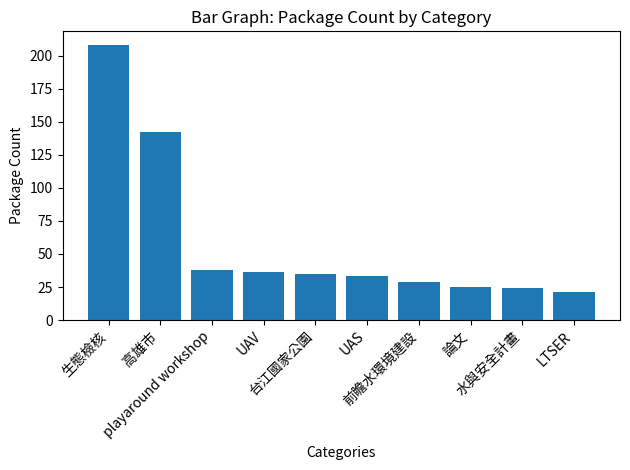

In [8]:
url = "http://data.depositar.io/api/3/action/package_search?facet.field=[%22tags%22]&facet.limit=10"
package_list = requests.get(url).json()

tag_number =  package_list['result']['facets']['tags']
tag_list = [{key,value} for key, value in tag_number.items()]
values = tag_number.values()
labels = tag_number.keys()
print(tag_list)
plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Package Count')
plt.title('Bar Graph: Package Count by Category')
plt.xticks(rotation=45, ha='right')  # To rotate the labels for better readability
plt.tight_layout()  # To prevent label cutoff
plt.show()


## Largest topic
<br>#include tags也做得到
<br>#Returning a list of packages is too expensive, 要顯現出該topic有什麼資料集是做不到的事情

[{'name': 'thcts', 'package_count': 115}, {'name': 'geography-and-places', 'package_count': 64}, {'name': 'natural-and-physical-sciences', 'package_count': 57}, {'name': 'society-and-social-sciences', 'package_count': 54}, {'name': 'eco-check', 'package_count': 51}, {'name': 'society', 'package_count': 45}, {'name': 'uas-observation', 'package_count': 40}, {'name': 'biota', 'package_count': 32}, {'name': 'oceans', 'package_count': 24}, {'name': 'farming', 'package_count': 18}, {'name': 'general-reference', 'package_count': 15}, {'name': 'culture-and-the-arts', 'package_count': 12}, {'name': 'economy', 'package_count': 12}, {'name': 'climatology-meteorology-atmosphere', 'package_count': 11}, {'name': 'human-activities', 'package_count': 10}, {'name': 'geoscientific-information', 'package_count': 10}, {'name': 'environment', 'package_count': 10}, {'name': 'religion-and-belief-systems', 'package_count': 9}, {'name': '14-climate-change', 'package_count': 9}, {'name': 'asian-soundscape-moni

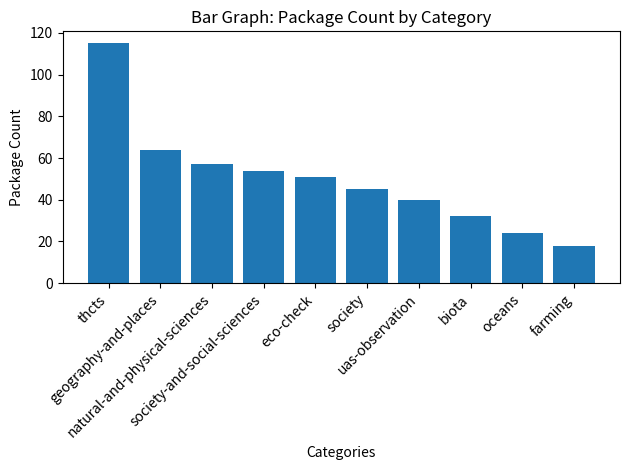

In [13]:

unsort_topic = []
for i in o_topic:
  unsort_topic.append({'name': i['name'], 'package_count': i['package_count']})

topic = sorted(unsort_topic, key=lambda x: x['package_count'],reverse=True)
values = [item['package_count'] for item in topic[:10]]
labels = [item['name'] for item in topic[:10]]
print(topic)

plt.bar(labels, values)
plt.xlabel('Categories')
plt.ylabel('Package Count')
plt.title('Bar Graph: Package Count by Category')
plt.xticks(rotation=45, ha='right')  # To rotate the labels for better readability
plt.tight_layout()  # To prevent label cutoff
plt.show()



## Largest type
<br> problem of undefined needs to be solved <br>

[('PDF', 1085), ('SHP', 130), ('undefined', 121), ('CSV', 100), ('JPEG', 99), ('HTML', 50), ('KML', 39), ('WMTS', 33), ('PNG', 15), ('KMZ', 14), ('XLSX', 12), ('lost', 11), ('DOC', 9), ('XML', 9), ('ZIP', 7), ('DOCX', 7), ('TIFF', 7), ('.PDF', 6), ('ODS', 6), ('geotif', 6), ('TIF', 6), ('.xlsx', 5), ('RAR', 5), ('external resources', 5), ('audio/x-wav', 5), ('PPTX', 4), ('.docx', 3), ('mat', 3), ('XLS', 3), ('TXT', 3), ('dBase', 3), ('CPG', 3), ('image/heic', 2), ('.jpg', 2), ('QGIS', 2), ('PPT', 2), ('ipynb', 1), ('warc', 1), ('python', 1), ('tif', 1), ('.zip', 1), ('website', 1), ('application/x-7z-compressed', 1), ('application/vnd.rar', 1), ('WARC', 1), ('ODT', 1), ('gtm', 1), ('GIF', 1), ('RAW', 1), ('GZ', 1), ('JSON', 1), ('WAV', 1), ('WMS', 1), ('geotiff', 1), ('ECW', 1)]
1841


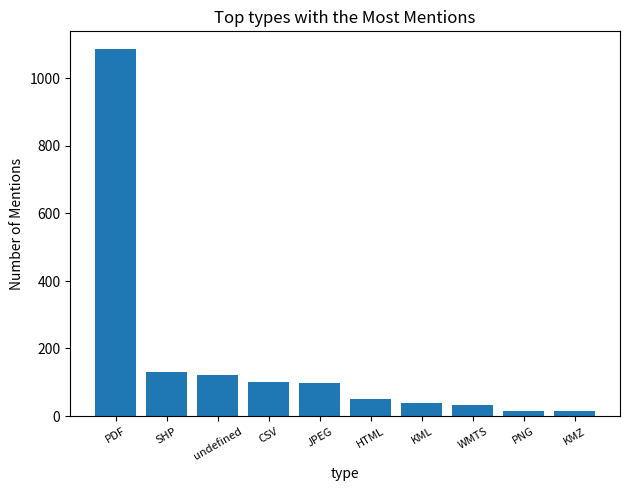

In [14]:
types = []

for j in o_dataset:
  if j['resources']:
      if j['resources'][0]['format']=='':
        types.append('undefined')
      elif j['resources'][0]['format']==".pdf":
        types.append('PDF')
      else:
        types.append(j['resources'][0]['format'])
  else:
      types.append('lost')

type_counts = Counter(types)
all_top_type = type_counts.most_common(120)
top_type = type_counts.most_common(10)

print(all_top_type)
all_top_type_mentions = [i[1] for i in all_top_type]
print(sum(all_top_type_mentions))

top_name = [i[0] for i in top_type]
top_type_mentions = [i[1] for i in top_type]

plt.bar(top_name, top_type_mentions)
plt.xlabel('type')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=30,fontsize=8)
plt.tight_layout()
plt.title('Top types with the Most Mentions')

plt.show()

## Largest project
<p></p>

[{'display_name': '惡地協作跨領域協作教學研究群 / Collaborative Badlands Project', 'packages': 125}, {'display_name': '110~111年高雄市生態檢核工作計畫', 'packages': 117}, {'display_name': '中研院人社中心GIS專題中心', 'packages': 117}, {'display_name': '嘉義縣生態檢核工作計畫(110-111年度)', 'packages': 76}, {'display_name': '(108-109年度)雲林縣生態檢核工作計畫委託技術服務案', 'packages': 64}, {'display_name': '「全國水環境改善計畫」高雄市政府生態檢核暨相關工作計畫', 'packages': 49}, {'display_name': '台江內海地區跨領域研究群 / Taijiang Project', 'packages': 43}, {'display_name': '嘉義縣生態檢核工作計畫(108-109年度)', 'packages': 42}, {'display_name': '苗栗縣生態檢核工作計畫(110-111年度)', 'packages': 33}, {'display_name': '國內WMTS服務資源清單', 'packages': 31}]


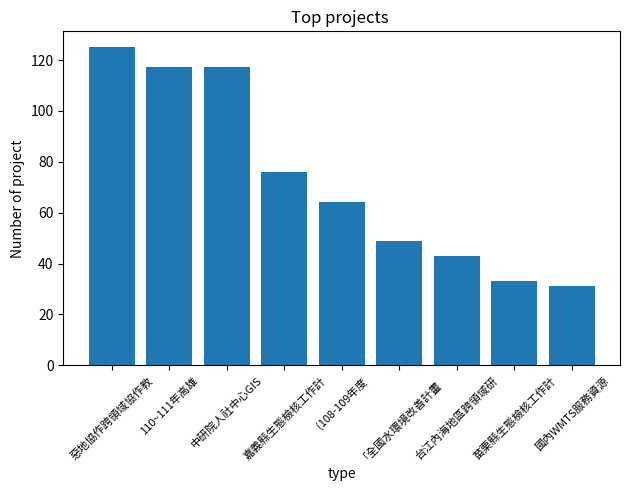

In [8]:
count_pro = 0
top_project = []

for i in o_project:
  count_pro += 1
  top_project.append({'display_name':i['display_name'],'packages':i['package_count']})

sort_project = sorted(top_project,key=lambda x:x['packages'],reverse=True)
pro_values = [i['packages']for i in sort_project[:10]]
pro_labels = [i['display_name'][:10] for i in sort_project[:10]]
print(sort_project[:10])
plt.bar(pro_labels,pro_values )
plt.xlabel('type')
plt.ylabel('Number of project')
plt.xticks(rotation=45,fontsize=8)
plt.tight_layout()
plt.title('Top projects ')

plt.show()